# python.studies
My notebook documenting my learnings from Wes McKinney's book [Python for Data Analysis 3E](https://wesmckinney.com/book/).<br><br>
This notebook won't serve as a general reference of the book as it will only show **WHAT I LEARNED** or **WHAT I FOUND NOTEWORTHY**. Other students will most likely have a completely different experience...

### Installations and settings
This section will host all pip installs that will be needed to run the code of this notebook and some usefull settings for Jupyter notebooks.

In [1]:
# Installs
! pip install -Uqq ipython
! pip install -Uqq ipykernel
! pip install -Uqq numpy
! pip install -Uqq pandas

In [2]:
# Settings
import numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
pd.set_option('display.width', 140)

### Chapter 2.2: IPython and Jupyter Notebooks basics
1. To **start the enhanced iPython interpreter** invoke the command  `iPython` in a terminal.
2. To **open a Jupyter notebook** from a workspace in Visual Studio Code in the default browser type the command `jupyter notebook` or `jupyter lab` in a terminal to start the Jupyter server.
3. Use `TAB` to invoke **tab completion** at the IPython prompt or in Jupyter notebooks.
4. **Tab completion also works for user-clared variables or class instances** showing all attributes and methods like `myclassinstance.<TAB>`.
5. By default magic and hidden functions are not shown this way. **To show magic and hidden functions** invoke `myclassinstance._<TAB>`.
6. Another area where tab completion saves time is in the **tab completion of function keyword arguments**.
7. Introspection: using a question mark (?) before or after a variable and executing the cell will like `x?<SHIFT+ENTER>` **display general information about an object**. Note: works only if the rest of the line is empty!
8. To display **contextual help** in a Jupyter notebook type `CTRL + i`.

In [ ]:
# 3. General code completion
np.da  # Place the cursor behind `da` and hit TAB

In [5]:
# 4. Code completion for user-declared variables 
x = 1
x.  # Place the cursor behind the dot and hit TAB

In [4]:
# 5. Code completion for magic / hidden functions
x = 1
x._  # Place the cursor behind the dot and hit TAB

True

In [16]:
# 6. Tab completion for function keyword arguments
def function_with_kwargs(abra = 1, abbra = 2, abbbra = 3):
    return abra, abbra, abbbra

In [ ]:
function_with_kwargs(ab  # Place the cursor behind ab and hit TAB

In [ ]:
# 7. Introspection

In [15]:
# Execute this cell
x = 1;x?

Type:        int
String form: 1
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4

### 2.3 Python basics

When **assigning a variable (or name) in Python, you are creating a reference** to the object shown on the righthand side of the equals sign.

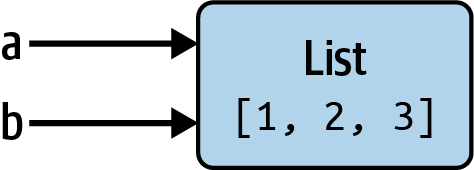

In [23]:
# Example
a = [1, 2, 3]
b = a
print(f"b after declaration is {b}")
a.append(4)
print(f"b after appending something to a is {b}")

b after declaration is [1, 2, 3]
b after appending something to a is [1, 2, 3, 4]


**Python has dynamic references, but strong types!**

References (~variable assignments) can be changed freely in a script but Python is a strongly typed language, which means that every object has a specific type (or class), and implicit conversions will occur only in certain permitted circumstances e.g., the divison of a float by an integer where the integer will be cast temporarily to a float.

In [29]:
# Dynamic references
a = 1
print(type(a))
a = "foo"
print(type(a))

# Note: both objects 1 and foo exist in memory until garbage collected but the object that a refers to is changed.

<class 'int'>
<class 'str'>


In [38]:
# Strong types
"5" + 5  # will throw an error as an implicit type conversion in Python does not exist in this case!

TypeError: can only concatenate str (not "int") to str

In [37]:
# Implicit conversion: divison of a float by an integer.
a = 4.5
b = 2
print(f"a is {type(a)} and b is {type(b)}.")
a / b
print(f"b is still {type(b)} after the operation.")

a is <class 'float'> and b is <class 'int'>.
b is still <class 'int'> after the operation.


**Knowing the type of an object is important**, and it’s useful to be able to write functions that can handle many different kinds of input. You can check that an object is an instance of a particular type using the `isinstance(object, type)` function or with a user-defined `isiterable(object)`function.

In [40]:
a = 5
print(isinstance(a, int))

True


In [52]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:  # not iterable
        return False
    
e = [[1, 2, 3], "foo", 1]
print([isiterable(element) for element in e])

[True, True, False]


Imports

In Python, a module is simply a file with the .py extension containing Python code. Suppose we had the following module:

    # some_module.py
    PI = 3.14159
    
    def f(x):
        return x + 2
    
    def g(a, b):
        return a + b
If we wanted to access the variables and functions defined in some_module.py, from another file in the same directory we could do:  

    import some_module
    result = some_module.f(5)
    pi = some_module.PI
Or alternately:  

    from some_module import g, PI
    result = g(5, PI)

Note the difference here! In the second import with `from...` we explicitely named the attributes / methods to import with the effect that we don't need to use the file name as prefix.

By using the as keyword, you can give imports different variable names:

    import some_module as sm
    from some_module import PI as pi, g as gf
    
    r1 = sm.f(pi)
    r2 = gf(6, pi)